# Stage 1: Task 3

The code below reads in the social, economic, housing, and covid19 csv files. Before I displayed the enrichment dataset, I combined them and transposed so that it will be easier to merge. I also had to rename the column names so that they did not include '!!Estimate' at the end of each county name.

In [1]:
import pandas as pd

#reads in csv files
social = pd.read_csv('../../../../data/stage_1/social.csv')
economic = pd.read_csv('../../../../data/stage_1/economic.csv')
housing = pd.read_csv('../../../../data/stage_1/housing.csv')
covid19 = pd.read_csv('../../../../data/stage_1/merged_covid19.csv')

#combines enrichment sets and transposes
enrichment = pd.concat([social, economic, housing])
enrichment.columns = enrichment.columns.str.replace('!!Estimate', '')
enrichment.index = enrichment['Label (Grouping)']
del enrichment['Label (Grouping)']
enrichment = enrichment.transpose()
display(enrichment.head())

Label (Grouping),HOUSEHOLDS BY TYPE,Total households,Married-couple family,With own children of the householder under 18 years,Cohabiting couple household,With own children of the householder under 18 years,"Male householder, no spouse/partner present",With own children of the householder under 18 years,Householder living alone,65 years and over,...,No rent paid,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI),Occupied units paying rent (excluding units where GRAPI cannot be computed),Less than 15.0 percent,15.0 to 19.9 percent,20.0 to 24.9 percent,25.0 to 29.9 percent,30.0 to 34.9 percent,35.0 percent or more,Not computed
"Baldwin County, Alabama",NaN,"82,325","42,253","12,382","4,044","1,483","13,776","1,193","10,594","3,445",...,N,NaN,"14,380","2,241","1,717","2,094","1,147","1,178","6,003","2,648"
"Calhoun County, Alabama",NaN,"44,636","20,571","6,800","2,851","1,228","7,268",460,"5,807","1,840",...,840,NaN,"12,083","1,657","1,855","1,634","1,264","1,014","4,659","1,074"
"Cullman County, Alabama",NaN,"32,090","17,070","6,332","1,603",702,"4,926",775,"3,102","1,530",...,N,NaN,"7,201","1,304","1,622",782,"1,081",573,"1,839",575
"DeKalb County, Alabama",NaN,"24,880","13,623","4,736","1,227",509,"4,469",425,"3,776","1,193",...,N,NaN,"5,695","1,165",751,671,529,"1,287","1,292","1,392"
"Elmore County, Alabama",NaN,"30,712","16,257","5,808","1,116",281,"5,150",0,"4,383","1,145",...,N,NaN,"6,881",801,"1,285",593,183,293,"3,726",968


Next, I had to create an index for the covid19 dataset that will be compatible with my enrichment set. So first, I converted the state abbreviations to their full names and then concatenated the county and state names.

Finally, I was able to merge and revert to our original index in the covid19 dataset.

In [2]:
#dictionary of states
states = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'DC': 'District of Columbia',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Lousiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennslyvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virgina',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
}

#creates new index for covid19 dataset
covid19['State name'] = covid19['State_cases'].map(states)
covid19.index = covid19['County Name'] + ', ' + covid19['State name']
del covid19['State name']

#merges covid19 and enrichment datasets
merged = pd.merge(covid19, enrichment, left_index=True, right_index=True)
merged.index = merged['UID']
del merged['UID']
display(merged.head())

,countyFIPS_cases,State_cases,StateFIPS_cases,2020-01-22_cases,2020-01-24_cases,2020-01-26_cases,2020-01-27_cases,2020-01-29_cases,2020-01-31_cases,2020-02-01_cases,...,No rent paid,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI),Occupied units paying rent (excluding units where GRAPI cannot be computed),Less than 15.0 percent,15.0 to 19.9 percent,20.0 to 24.9 percent,25.0 to 29.9 percent,30.0 to 34.9 percent,35.0 percent or more,Not computed
UID,,,,,,,,,,,,,,,,,,,,,
01003AL,1003,AL,1,0,0,0,0,0,0,0,...,N,NaN,"14,380","2,241","1,717","2,094","1,147","1,178","6,003","2,648"
01015AL,1015,AL,1,0,0,0,0,0,0,0,...,840,NaN,"12,083","1,657","1,855","1,634","1,264","1,014","4,659","1,074"
01043AL,1043,AL,1,0,0,0,0,0,0,0,...,N,NaN,"7,201","1,304","1,622",782,"1,081",573,"1,839",575
01049AL,1049,AL,1,0,0,0,0,0,0,0,...,N,NaN,"5,695","1,165",751,671,529,"1,287","1,292","1,392"
01051AL,1051,AL,1,0,0,0,0,0,0,0,...,N,NaN,"6,881",801,"1,285",593,183,293,"3,726",968


Converting to csv file for stage 3.

In [3]:
merged.to_csv('soc_econ_house_cases.csv')

This section analyzes the cases of Hawaii in the last week of our dataset. Based on the information, the cases are slightly increasing in all counties except Kalawao where the cases remain zero.

,2021-08-10_cases,2021-08-11_cases,2021-08-12_cases,2021-08-13_cases,2021-08-14_cases,2021-08-15_cases,2021-08-16_cases
"Hawaii County, Hawaii",4956,5035,5157,5308,5308,5308,5669
"Honolulu County, Hawaii",33993,34291,34592,35429,35429,35429,36892
"Kalawao County, Hawaii",0,0,0,0,0,0,0
"Kauai County, Hawaii",665,682,732,778,778,778,853
"Maui County, Hawaii",5846,5912,5982,6097,6097,6097,6313


<AxesSubplot:>

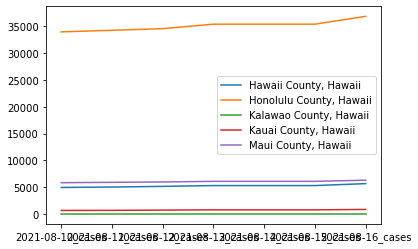

In [4]:
#displays table and graph
hawaii = covid19.iloc[546:551, 548:555]
display(hawaii)
hawaii = hawaii.transpose()
hawaii.plot()